** About the Notebook 

ML End2End project performs all the algorithms on a given (input) data set and gives out the all scoring aspects and also denoted in the graphical notation.

*** Credits: 

By: 

Lavi Nigam Data Scientist@Gartner,G.Padmasri  

Version 2 Plan: 

-- Modelling 

	- Base Modelling
	- Grid Search 
	- HyperOpt 
	- Bayesian Tuning 
	- Model Stacks

-- Alternative ML Libs/AutoMl

	- FastAI 
	- TPot 


Sheet 4: 

-- Post Model ( Model Interpretation, Eli5, Shap) 

Sheet 5: 
-- Optimization of Pipelines 

	- RAPID - cuDF, cuML ( Why GPU’s are better) 
	- Dask 

  
-- Production (Docker , API, Calls) 


Major Library: 
Docker 
Dask 
Rapid
Vaex 
MLExtend 
PlotlyExpress (Graphs) 
SHAP
IBM 360 
https://github.com/bokeh/bokeh


 # Installation & Library

In [0]:
!pip install vecstack
!pip -q install shap
!pip -q install lime
!pip -q install eli5
!pip install tpot
!pip install hyperopt

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19879 sha256=490250cb58a738a110156d233a2c186329e7058eae6b05e6b6c15f075ae904d5
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack
     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 276kB 2.7MB/s 
     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 153kB 7.8MB/s 
     |████████████████████████████████| 61kB 11.3MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=ecd881e21baed8c2d727aa0f493a964de1fa8712234098d8c442ddc70b5741bf
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully unins

In [0]:
#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# from tpot import TPOTClassifier
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold
import warnings
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import itertools

# Basic Pre-Processing

In [0]:
# Mobile call Dataset.
data = pd.read_csv("/content/August19_myspeed.csv")
data['signal_strength'].fillna(data['signal_strength'].dropna().mean(), inplace=True)
#Change Technology to Numeric
data['technology'] = data['technology'].map( {'3G': 0, '4G': 1} ).astype(int)
data = data.drop(['Service_provider','Download_Upload', 'Service_Area'], axis=1)

X = pd.get_dummies(data[data.columns.difference(['technology'])], drop_first=True)
y = data['technology']



In [0]:
# Train reservaion Dataset.
data = pd.read_csv("https://raw.githubusercontent.com/Mineria/Titanic/master/csv/train.csv")

# Drop Ticket & Cabin 
#data = data.drop(['Ticket', 'Cabin'], axis=1)

# Get the title from name
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
data['Title'] = data['Title'].map(title_mapping)
data = data.drop(['Name', 'PassengerId'], axis=1)

#Change Sex to Numeric
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#Add Family Size 
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

#Imputing Missing Value 
data['Age'].fillna(data['Age'].dropna().median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].dropna().mode()[0], inplace=True)

# Categorizing Numerical Value 
data['FareBand'] = pd.qcut(data['Fare'], 4).astype(str)
data['AgeBand'] = pd.qcut(data['Age'], 4).astype(str)
# data = data.drop(['Fare', 'Age'], axis=1)

# Converting Embark to Number
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

data['FareBand'] = data['FareBand'].map( {'(-0.001, 7.91]': 0, '(31.0, 512.329]': 3, '(7.91, 14.454]': 1, '(14.454, 31.0]':2 } ).astype(int)
data['AgeBand'] = data['AgeBand'].map( {'(0.419, 22.0]': 0, '(35.0, 80.0]': 3, '(22.0, 28.0]': 1, '(28.0, 35.0]':2 } ).astype(int)

data = data.drop(['Age','Fare'], axis=1)

for col in data.columns:
    data[col] = data[col].astype('category')

X = pd.get_dummies(data[data.columns.difference(['Survived'])], drop_first=True)
y = data['Survived']

# Base Modelling

In [0]:
class BaseModellingHelper:

    def __init__(self, std_param, base_model):
        # if not set(grid_models.keys()).issubset(set(grid_params.keys()))  \
        #       or not set(popt_models.keys()).issubset(set(popt_params.keys())) \
        #       or not set(automl_model.keys()).issubset(set(automl_params.keys())) \
        #       or not set(dl_model.keys()).issubset(set(dl_params.keys())):

        #     missing_params_grid = list(set(grid_models.keys()) - set(grid_params.keys()))
        #     missing_params_popt = list(set(popt_models.keys()) - set(popt_params.keys()))
        #     missing_params_automl = list(set(automl_model.keys()) - set(automl_params.keys()))
        #     missing_params_dl = list(set(dl_model.keys()) - set(dl_params.keys()))

        #     raise ValueError("Some estimators are missing parameters: %s" % missing_params_grid, missing_params_popt,missing_params_automl,missing_params_dl)
        
        self.std_param = std_param
        if self.std_param['Split_type'] == 'ShuffleSplit':
          self.cross_val = model_selection.ShuffleSplit(n_splits = self.std_param['folds'], test_size = self.std_param['test_size'], train_size = self.std_param['train_size'], random_state = self.std_param['seed'] )
        
        self.base_model = base_model
        self.base_model_output = {}
        self.feature_importance_df_sorted = pd.DataFrame()
        #self.important_col =[] 
        
        self.scoring = { 'accuracy' : make_scorer(metrics.accuracy_score), 
                  'precision' : make_scorer(metrics.precision_score),
                  'recall' : make_scorer(metrics.recall_score), 
                  'f1_score' : make_scorer(metrics.f1_score),
                  'average_precision': make_scorer(metrics.average_precision_score),
                  'balanced_accuracy': make_scorer(metrics.balanced_accuracy_score),
                  'hamming_loss':make_scorer(metrics.hamming_loss),
                  'jaccard_score': make_scorer(metrics.jaccard_score),
                  'log_loss': make_scorer(metrics.log_loss),
                  'roc_auc_score':make_scorer(metrics.roc_auc_score),
                  'zero_one_loss':make_scorer(metrics.zero_one_loss,normalize=False)
                  }
                    

        self.scores_list = []
        # self.grid_searches = {}
        # self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier']
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.std_param['test_size'])

        # End of BaseModellingHelper
    
    def getScoreDictionary(self, base_model_output,modelname, basemodel_scores, score_type):
      self.base_model_output[modelname]['Time'] = basemodel_scores['fit_time'].mean()
      self.base_model_output[modelname]['%s_accuracy' %score_type ] =  basemodel_scores['%s_accuracy' %score_type].mean()
      self.base_model_output[modelname]['%s_precision' %score_type ] =  basemodel_scores['%s_precision' %score_type].mean()
      self.base_model_output[modelname]['%s_recall' %score_type ] =  basemodel_scores['%s_recall' %score_type].mean()
      self.base_model_output[modelname]['%s_f1_score' %score_type ] =  basemodel_scores['%s_f1_score' %score_type].mean()
      self.base_model_output[modelname]['%s_average_precision' %score_type ] =  basemodel_scores['%s_average_precision' %score_type].mean()
      self.base_model_output[modelname]['%s_balanced_accuracy' %score_type ] =  basemodel_scores['%s_balanced_accuracy' %score_type].mean()
      self.base_model_output[modelname]['%s_hamming_loss' %score_type ] =  basemodel_scores['%s_hamming_loss' %score_type].mean()
      self.base_model_output[modelname]['%s_jaccard_score' %score_type ] =  basemodel_scores['%s_jaccard_score' %score_type].mean()
      self.base_model_output[modelname]['%s_log_loss' %score_type ] =  basemodel_scores['%s_log_loss' %score_type].mean()
      self.base_model_output[modelname]['%s_roc_auc_score' %score_type ] =  basemodel_scores['%s_roc_auc_score' %score_type].mean()
      self.base_model_output[modelname]['%s_zero_one_loss' %score_type ] =  basemodel_scores['%s_zero_one_loss' %score_type].mean()

      return None

    def ModelLoop(self,X, y, score_type=None):
      
      for key, eachModel in self.base_model.items():
          print(key)
          basemodel_scores = model_selection.cross_validate(eachModel, X,y, cv  = self.cross_val,return_train_score=True,scoring=self.scoring, pre_dispatch="2*n_jobs")
          modelname = eachModel.__class__.__name__
          print(modelname)
          self.base_model_output[modelname] = {}   
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores, 'train')
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores, 'test')
          self.scores_list.append(basemodel_scores)
          if eachModel.__class__.__name__ in self.FeatureImportanceAlgo:
            eachModel.fit(X,y)
            self.feature_importance[eachModel.__class__.__name__]= eachModel.feature_importances_

    def runBaseLineModel(self, X, y, score_type=None, auto_feature_eng = None , top_feature = None ):
      if top_feature:
        print ("Building model with only %s important feature" % top_feature)
        #Initial Model Loop to extract top feature
        self.ModelLoop(X, y, score_type)
        imp_df = self.getFeatureImportance(self.getFeatureImportanceDF(X, self.feature_importance))
        important_col = list(imp_df[:top_feature].index)
      # self.important_col = important_col
        X = X[important_col]
        self.ModelLoop(X, y,score_type)
      else:
        print ("Building model without any important feature")
        self.ModelLoop(X, y,score_type)
        
    def getFeatureImportanceDF(self, X, feature_importance_dict, important_col=None):
      if important_col:
       # feature_names = important_col
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = important_col   #feature_names
        return feat_imp_df
      else:
       # feature_names = X.columns
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = X.columns #feature_names
        return feat_imp_df

    def getFeatureImportance(self,feat_imp_df):
      mms = MinMaxScaler()
      # scaling to MinMax Scale 
      scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),columns=feat_imp_df.columns,index=feat_imp_df.index)
      # Adding all values of importance to get single socre
      scaled_fi['SumofImp'] = scaled_fi.sum(axis=1)
      # print(scaled_fi.head())
      ordered_ranking = scaled_fi.sort_values('SumofImp', ascending=False)
      return ordered_ranking


    def getFeatureImportanceGraph(self,ordered_feature_importance_df):
      self.feature_importance_df_sorted.append(ordered_feature_importance_df)
      fig, ax = plt.subplots(figsize=(10,7), dpi=80)
      sns.barplot(data=ordered_feature_importance_df, y=ordered_feature_importance_df.index, x='SumofImp', palette='magma')
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.xaxis.set_visible(False)
      ax.grid(False)
      ax.set_title('Aggregated Feature Importances for Models');
      return ax

    def getModelDataframe(self, base_model_output, sort_column, asscending=False,difference_by=None, score_filter=None):
      score_table =  pd.DataFrame.from_dict(base_model_output).T
      if score_filter:
        score_columns = [['train_'+ eachScore,'test_'+eachScore] for eachScore in score_filter]
        score_columns_flat = list(itertools.chain(*score_columns))
        score_columns_flat.append("Time")
        score_table = score_table[score_columns_flat]
      score_table['Difference_%s_unit'%difference_by] = abs(score_table['train_%s' %difference_by] - score_table['test_%s' %difference_by])*100
      score_table_ordered = score_table.sort_values(sort_column, ascending=asscending)
      return score_table_ordered
    
    def getModelValidationGraph(self, ModelDataFrame, x_col= None, Difference_bins=5,difference_col=None,size=None):
      ModelDataFrame['MLName'] = ModelDataFrame.index
      ModelDataFrame['Difference_Bin'] = pd.cut(ModelDataFrame[difference_col],Difference_bins)
      ax = plt.figure(figsize=(18,8))
      # sns.scatterplot(x=x_col, y="MLName",data=ModelDataFrame,size='Time', hue='Difference_Bin',sizes=(20, 600), hue_norm=(0, 20))
      fig = px.scatter(ModelDataFrame, x=x_col, y="MLName", color="Difference_Bin",size=size)
      # fig.show()
      # ax.grid(False)
      # ax.set_title('Model Validation & Overfitting');
      return fig

In [0]:

basic_params = {
  'seed':123,
  'folds': 10,
  'test_size': 0.3,
  'train_size': 0.7,
  'n_jobs':-1,
  'verbose':3,
  'scoring':'f1',   
  'Split_type': 'ShuffleSplit',
  'warning': warnings.filterwarnings('ignore'),
  'normalize': True
  }

base_model = {
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GaussianProcessClassifier':gaussian_process.GaussianProcessClassifier(),
    'LogisticRegressionCV':linear_model.LogisticRegressionCV(),
    'PassiveAggressiveClassifier':linear_model.PassiveAggressiveClassifier(),
    'RidgeClassifierCV':linear_model.RidgeClassifierCV(),
    'SGDClassifier':linear_model.SGDClassifier(),
    'Perceptron':linear_model.Perceptron(),
    'BernoulliNB':naive_bayes.BernoulliNB(),
    'GaussianNB':naive_bayes.GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':svm.SVC(probability=True),
    #'NuSVC':svm.NuSVC(probability=True),
    'LinearSVC':svm.LinearSVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LinearDiscriminantAnalysis':discriminant_analysis.LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis':discriminant_analysis.QuadraticDiscriminantAnalysis(),
    'XGBClassifier':XGBClassifier(),
    'LGBMClassifier':LGBMClassifier()    

}

In [0]:
ModelObject = BaseModellingHelper(basic_params,base_model)

# Base Modeller Class: 

    - .Fit that can take X, Y 
      - option to select all metric or specific metric or combination 
    - Display Dataframe of all base accuracy 
        - Option to only display specific Metric 
        - Order of the metric 
        - Sort Colum 

In [0]:
%time ModelObject.runBaseLineModel(X,y,score_type='test')

Building model without any important feature
AdaBoostClassifier
AdaBoostClassifier
BaggingClassifier
BaggingClassifier
ExtraTreesClassifier
ExtraTreesClassifier
GradientBoostingClassifier
GradientBoostingClassifier
RandomForestClassifier
RandomForestClassifier
GaussianProcessClassifier
GaussianProcessClassifier
LogisticRegressionCV
LogisticRegressionCV
PassiveAggressiveClassifier
PassiveAggressiveClassifier
RidgeClassifierCV
RidgeClassifierCV
SGDClassifier
SGDClassifier
Perceptron
Perceptron
BernoulliNB
BernoulliNB
GaussianNB
GaussianNB
KNeighborsClassifier
KNeighborsClassifier
SVC
SVC
LinearSVC
LinearSVC
DecisionTreeClassifier
DecisionTreeClassifier
LinearDiscriminantAnalysis
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
QuadraticDiscriminantAnalysis
XGBClassifier
XGBClassifier
LGBMClassifier
LGBMClassifier
CPU times: user 13.7 s, sys: 4.16 s, total: 17.9 s
Wall time: 12.4 s


In [0]:
ModelObject.getModelDataframe(ModelObject.base_model_output,sort_column=['Difference_recall_unit','train_zero_one_loss'],asscending=[True, True],difference_by='recall',score_filter=['f1_score','precision','recall','zero_one_loss'])

,train_f1_score,test_f1_score,train_precision,test_precision,train_recall,test_recall,train_zero_one_loss,test_zero_one_loss,Time,Difference_recall_unit
LogisticRegressionCV,0.980376,0.984575,0.961516,0.969667,1.000000,1.000000,26.9,9.1,0.096799,0.000000
RidgeClassifierCV,0.980376,0.984575,0.961516,0.969667,1.000000,1.000000,26.9,9.1,0.002959,0.000000
BernoulliNB,0.980376,0.984575,0.961516,0.969667,1.000000,1.000000,26.9,9.1,0.002120,0.000000
KNeighborsClassifier,0.980376,0.984575,0.961516,0.969667,1.000000,1.000000,26.9,9.1,0.002002,0.000000
SVC,0.980376,0.984575,0.961516,0.969667,1.000000,1.000000,26.9,9.1,0.010466,0.000000
LinearDiscriminantAnalysis,0.980376,0.984575,0.961516,0.969667,1.000000,1.000000,26.9,9.1,0.002270,0.000000
XGBClassifier,0.980591,0.984406,0.961929,0.969662,1.000000,0.999662,26.6,9.2,0.022997,0.033784
SGDClassifier,0.966956,0.970002,0.962967,0.969862,0.971112,0.970520,44.5,17.4,0.002264,0.059121
PassiveAggressiveClassifier,0.886989,0.889511,0.954308,0.965102,0.885173,0.883720,102.0,42.4,0.002081,0.145316
AdaBoostClassifier,0.983818,0.983703,0.968300,0.970237,0.999851,0.997594,22.1,9.6,0.070580,0.225725


In [0]:
df = ModelObject.getModelDataframe(ModelObject.base_model_output,sort_column=['Difference_recall_unit'],asscending=[True],difference_by='recall')

In [0]:
df.head()

,Time,train_accuracy,train_precision,train_recall,train_f1_score,train_average_precision,train_balanced_accuracy,train_hamming_loss,train_jaccard_score,train_log_loss,train_roc_auc_score,train_zero_one_loss,test_accuracy,test_precision,test_recall,test_f1_score,test_average_precision,test_balanced_accuracy,test_hamming_loss,test_jaccard_score,test_log_loss,test_roc_auc_score,test_zero_one_loss,Difference_recall_unit
LinearDiscriminantAnalysis,0.002270,0.961516,0.961516,1.0,0.980376,0.961516,0.5,0.038484,0.961516,1.329205,0.5,26.9,0.969667,0.969667,1.0,0.984575,0.969667,0.5,0.030333,0.969667,1.0477,0.5,9.1,0.0
SVC,0.010466,0.961516,0.961516,1.0,0.980376,0.961516,0.5,0.038484,0.961516,1.329205,0.5,26.9,0.969667,0.969667,1.0,0.984575,0.969667,0.5,0.030333,0.969667,1.0477,0.5,9.1,0.0
KNeighborsClassifier,0.002002,0.961516,0.961516,1.0,0.980376,0.961516,0.5,0.038484,0.961516,1.329205,0.5,26.9,0.969667,0.969667,1.0,0.984575,0.969667,0.5,0.030333,0.969667,1.0477,0.5,9.1,0.0
LogisticRegressionCV,0.096799,0.961516,0.961516,1.0,0.980376,0.961516,0.5,0.038484,0.961516,1.329205,0.5,26.9,0.969667,0.969667,1.0,0.984575,0.969667,0.5,0.030333,0.969667,1.0477,0.5,9.1,0.0
RidgeClassifierCV,0.002959,0.961516,0.961516,1.0,0.980376,0.961516,0.5,0.038484,0.961516,1.329205,0.5,26.9,0.969667,0.969667,1.0,0.984575,0.969667,0.5,0.030333,0.969667,1.0477,0.5,9.1,0.0


In [0]:
df.columns

Index(['Time', 'train_accuracy', 'train_precision', 'train_recall',
       'train_f1_score', 'train_average_precision', 'train_balanced_accuracy',
       'train_hamming_loss', 'train_jaccard_score', 'train_log_loss',
       'train_roc_auc_score', 'train_zero_one_loss', 'test_accuracy',
       'test_precision', 'test_recall', 'test_f1_score',
       'test_average_precision', 'test_balanced_accuracy', 'test_hamming_loss',
       'test_jaccard_score', 'test_log_loss', 'test_roc_auc_score',
       'test_zero_one_loss', 'Difference_recall_unit'],
      dtype='object')

In [0]:
df.drop(['train_zero_one_loss','test_zero_one_loss','train_log_loss','test_log_loss'],inplace=True,axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Difference_recall_unit'] = scaler.fit_transform(df['Difference_recall_unit'].values.reshape(-1,1))

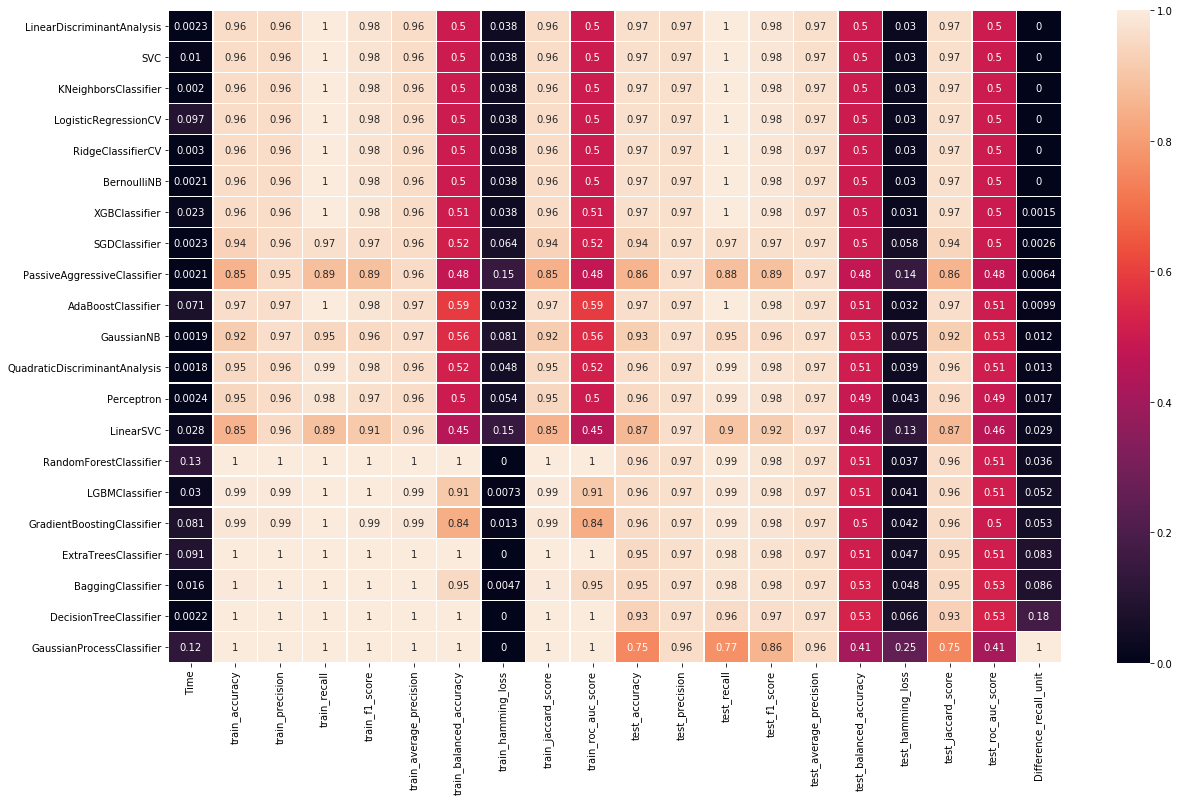

In [0]:
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)

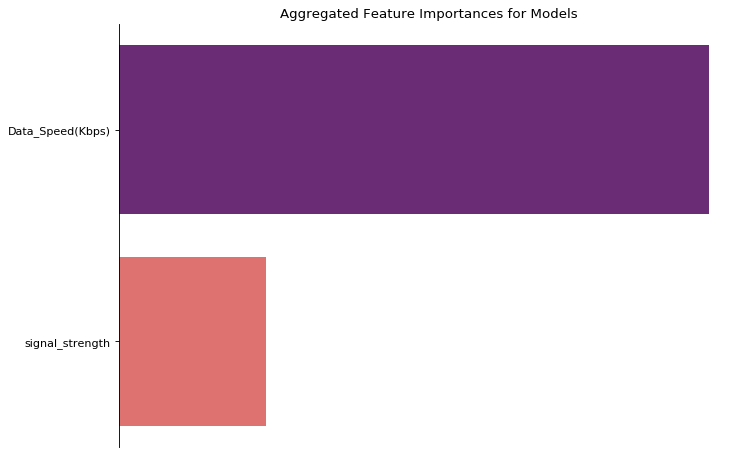

In [0]:
ModelObject.getFeatureImportanceGraph(ModelObject.getFeatureImportance(ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance)))

In [0]:
Modeldf = ModelObject.getModelDataframe(ModelObject.base_model_output,sort_column=['Difference_recall_unit','train_zero_one_loss'],asscending=[True, True],difference_by='recall',score_filter=['f1_score','precision','recall','zero_one_loss'])

In [0]:
ModelObject.getModelValidationGraph(Modeldf,x_col='train_recall', Difference_bins=5,difference_col ='Difference_recall_unit',size='Time')

<Figure size 1296x576 with 0 Axes>

In [0]:
ModelObject.getModelValidationGraph(Modeldf,x_col='test_zero_one_loss', Difference_bins=5,difference_col ='Difference_recall_unit',size='Time')

LogisticRegressionCV                      LogisticRegressionCV
RidgeClassifierCV                            RidgeClassifierCV
BernoulliNB                                        BernoulliNB
KNeighborsClassifier                      KNeighborsClassifier
SVC                                                        SVC
LinearDiscriminantAnalysis          LinearDiscriminantAnalysis
XGBClassifier                                    XGBClassifier
LinearSVC                                            LinearSVC
PassiveAggressiveClassifier        PassiveAggressiveClassifier
AdaBoostClassifier                          AdaBoostClassifier
GaussianNB                                          GaussianNB
QuadraticDiscriminantAnalysis    QuadraticDiscriminantAnalysis
Perceptron                                          Perceptron
SGDClassifier                                    SGDClassifier
RandomForestClassifier                  RandomForestClassifier
LGBMClassifier                                  LGBMCla

<Figure size 1296x576 with 0 Axes>